## Reference 보정을 이용한 AutoML

prototype 2-1에서 얻은 최선의 pipeline을 이용 -> 가중평균반사도 예측진행

In [2]:
import pandas as pd
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import cv2

In [23]:
reflectance = pd.read_csv('./data/reflectance.csv').iloc[:,0]
reflectance = reflectance.drop(33, axis=0)
reflectance = reflectance.to_numpy()
reflectance

array([21.4       , 21.05      , 21.57      , 20.        , 16.81      ,
       16.79      , 16.62      , 15.52      , 13.64      , 13.77      ,
       14.26      , 13.49      , 12.66      , 12.62      , 12.38      ,
       11.74      , 12.96      , 12.97      , 13.        , 12.95      ,
       12.39      , 12.4       , 11.7       , 12.25      , 12.94      ,
       11.84      , 12.28      , 12.77      , 15.7       , 13.8       ,
       14.96      , 15.42      , 14.03      , 13.64      , 14.52      ,
       12.46      , 11.87      , 12.56      , 12.4       , 12.99      ,
       12.17      , 13.07      , 13.07      , 14.83      , 15.02      ,
       14.98      , 15.09      , 12.64      , 12.65      , 12.65      ,
       12.37      , 12.75      , 12.85      , 13.06      , 12.93      ,
       14.93      , 14.72      , 15.04      , 14.89666667, 17.69      ,
       17.34      , 16.95      , 17.326     , 15.1       , 15.35      ,
       14.53      , 14.75      , 16.75      , 17.01      , 17.54

In [25]:
Table_dataset = pd.read_csv("./data/RGB.csv")
Table_dataset['Reflectance'] = reflectance
Table_dataset

,R,G,B,Thickness,Reflectance
0,11.576000,10.883200,8.136400,48.266667,21.40
1,10.826174,11.729849,9.594695,47.966667,21.05
2,13.336985,12.112036,8.233817,48.166667,21.57
3,9.354297,9.887613,6.912199,48.600000,20.00
4,4.799665,2.776091,1.086510,59.533333,16.81
...,...,...,...,...,...
122,0.503564,4.690656,18.853995,84.633333,11.43
123,0.825026,14.850428,27.031939,98.366667,13.58
124,0.969714,13.035919,33.905851,97.033333,13.44
125,1.159944,13.412763,32.316093,96.266667,13.13


### RGB+Thickness -> Reflectance

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Table_dataset.iloc[:,:-1], Table_dataset.iloc[:,-1], test_size=0.3, random_state=42)

In [27]:
from tpot import TPOTRegressor

tpot =  TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, cv=5, n_jobs = -1)
tpot.fit(X_train, y_train)

tpot.export('tpot_corrected.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.9219574527447465

Generation 2 - Current best internal CV score: -0.8778066385013895

Generation 3 - Current best internal CV score: -0.8515157464674236

Generation 4 - Current best internal CV score: -0.7155265356907157

Generation 5 - Current best internal CV score: -0.6866990653581684

Best pipeline: AdaBoostRegressor(Normalizer(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.1, min_samples_leaf=4, min_samples_split=6, n_estimators=100), norm=max), learning_rate=0.01, loss=linear, n_estimators=100)


In [28]:
y_pred = tpot.predict(X_test)
y_pred

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([12.70541667, 14.69909091, 12.70408163, 14.98194444, 12.70461538,
       14.5175    , 12.70377778, 12.7025641 , 14.49125   , 17.08555556,
       14.71719298, 14.70944444, 12.69475   , 16.6625    , 12.68676471,
       15.70761905, 12.69475   , 12.68676471, 12.976     , 12.69475   ,
       12.74860465, 14.48823529, 12.69475   , 22.36      , 20.99      ,
       22.16      , 16.978125  , 16.98571429, 12.69477273, 12.69475   ,
       14.62363636, 12.976     , 12.69475   , 16.936     , 12.78162791,
       15.35      , 12.71294118, 22.61      , 12.68676471])

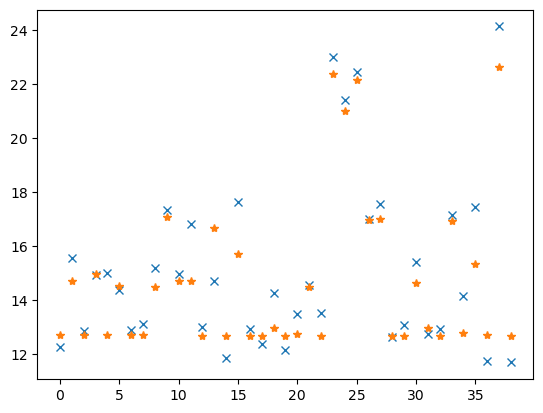

In [29]:
plt.plot(y_test.values,'x', label = 'True')
plt.plot(y_pred,'*', label = 'Predict')

In [30]:
pd.DataFrame({'True': y_test.values, 'Predict': y_pred})

,True,Predict
0,12.280,12.705417
1,15.560,14.699091
2,12.860,12.704082
3,14.930,14.981944
4,15.020,12.704615
5,14.380,14.517500
6,12.890,12.703778
7,13.130,12.702564
8,15.190,14.491250
9,17.326,17.085556


In [31]:
mse = np.mean((y_test.values - y_pred)**2)
mse

0.9146425819635103

In [33]:
Table_dataset_2 = Table_dataset.drop('Thickness', axis=1)
Table_dataset_2

,R,G,B,Reflectance
0,11.576000,10.883200,8.136400,21.40
1,10.826174,11.729849,9.594695,21.05
2,13.336985,12.112036,8.233817,21.57
3,9.354297,9.887613,6.912199,20.00
4,4.799665,2.776091,1.086510,16.81
...,...,...,...,...
122,0.503564,4.690656,18.853995,11.43
123,0.825026,14.850428,27.031939,13.58
124,0.969714,13.035919,33.905851,13.44
125,1.159944,13.412763,32.316093,13.13


### RGB -> Reflectance

In [34]:
X_train, X_test, y_train, y_test = train_test_split(Table_dataset_2.iloc[:,:-1], Table_dataset_2.iloc[:,-1], test_size=0.3, random_state=42)

In [35]:
from tpot import TPOTRegressor

tpot =  TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, cv=5, n_jobs = -1)
tpot.fit(X_train, y_train)

tpot.export('tpot_corrected_2.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.0042704504954163

Generation 2 - Current best internal CV score: -0.7292444520431813

Generation 3 - Current best internal CV score: -0.6370340800427801

Generation 4 - Current best internal CV score: -0.6370340800427801

Generation 5 - Current best internal CV score: -0.5767256963409977

Best pipeline: AdaBoostRegressor(LinearSVR(input_matrix, C=10.0, dual=True, epsilon=0.1, loss=epsilon_insensitive, tol=1e-05), learning_rate=0.1, loss=exponential, n_estimators=100)


In [36]:
y_pred = tpot.predict(X_test)
y_pred

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


array([12.53780488, 14.7405    , 12.54952381, 14.55575758, 12.678     ,
       14.62717949, 12.58622222, 12.6825    , 14.62717949, 17.69      ,
       14.15576577, 14.7405    , 12.55333333, 14.73539216, 12.45695652,
       17.34153846, 12.59657895, 12.519375  , 14.23877193, 12.59657895,
       13.74764706, 14.62717949, 12.55333333, 22.47      , 20.69555556,
       21.57      , 17.59      , 17.01571429, 12.538125  , 12.54142857,
       14.71428571, 12.55333333, 13.082     , 17.05666667, 14.08666667,
       17.53      , 13.82176471, 22.67666667, 12.46297297])

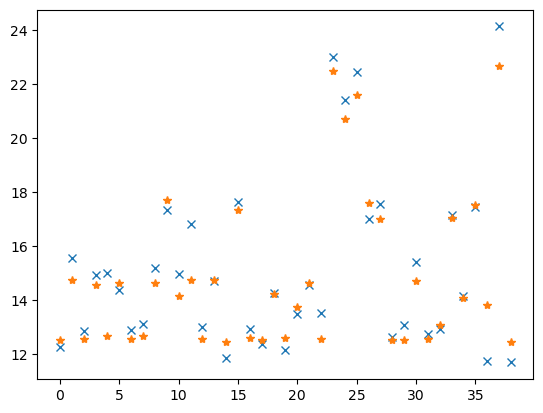

In [37]:
plt.plot(y_test.values,'x', label = 'True')
plt.plot(y_pred,'*', label = 'Predict')

In [38]:
pd.DataFrame({'True': y_test.values, 'Predict': y_pred})

,True,Predict
0,12.280,12.537805
1,15.560,14.740500
2,12.860,12.549524
3,14.930,14.555758
4,15.020,12.678000
5,14.380,14.627179
6,12.890,12.586222
7,13.130,12.682500
8,15.190,14.627179
9,17.326,17.690000


In [39]:
mse = np.mean((y_test.values - y_pred)**2)
mse

0.621984312914535

- 오히려 Thickness 없이 예측하는 것이 예측정확도 더 높다.